In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer

In [18]:
df = pd.read_csv('/content/uber.csv')

In [19]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [20]:
# Preprocessing: Convert pickup_datetime to datetime and extract features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek


In [21]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,day_of_week
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [22]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'key', 'pickup_datetime'])

In [32]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


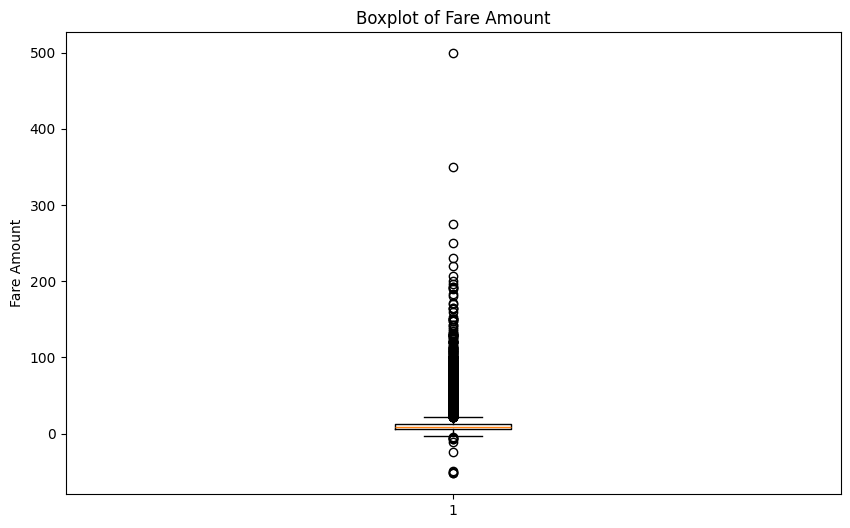

In [33]:
# Show outliers using a boxplot (Add this part)
plt.figure(figsize=(10, 6))
plt.boxplot(df_imputed['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.ylabel('Fare Amount')
plt.show()


In [34]:
# Remove outliers using IQR method (Add this part)
Q1 = df_imputed['fare_amount'].quantile(0.25)
Q3 = df_imputed['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

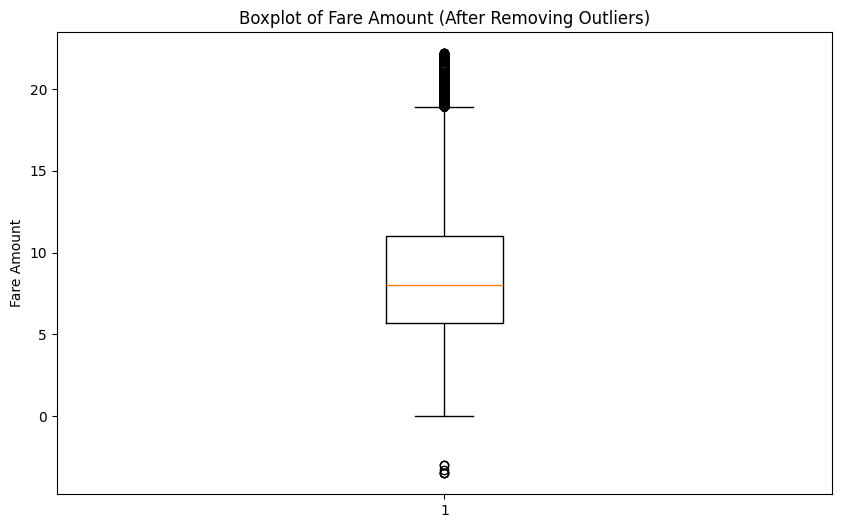

In [35]:
# Filter the data to remove outliers
df_no_outliers = df_imputed[(df_imputed['fare_amount'] >= lower_bound) & (df_imputed['fare_amount'] <= upper_bound)]

# Show outliers removed (Add this part)
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers['fare_amount'])
plt.title('Boxplot of Fare Amount (After Removing Outliers)')
plt.ylabel('Fare Amount')
plt.show()

In [36]:
# Split the data into features (X) and target (y)
X = df_no_outliers.drop(columns=['fare_amount'])  # create new dataset ignoring 'fare_amount' column
y = df_no_outliers['fare_amount']  # create a series of only 'fare_amount' column

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Implement Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [40]:
# Implement Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [41]:
# Implement Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can experiment with different alpha values
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [42]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - R2 Score: {r2:.4f}, RMSE: {rmse:.2f}")

In [43]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Linear Regression - R2 Score: 0.0214, RMSE: 4.09
Ridge Regression - R2 Score: 0.0214, RMSE: 4.09
Lasso Regression - R2 Score: 0.0196, RMSE: 4.10
